https://www.kaggle.com/datasets/preetviradiya/brian-tumor-dataset

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
import glob 

In [43]:
def load_images_from_folder(folder, label):
    images = []
    labels = []  # Prepare a list to store the labels of the images
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (64, 64))  # Resize images to uniform size
            images.append(img)
            labels.append(label)
    return images, labels

# Paths to your datasets
tumor_path = 'C:/Users/HP/Desktop/PFG/CODIGO/img_png_res/TUMOR_PNG_RES'
non_tumor_path = 'C:/Users/HP/Desktop/PFG/CODIGO/img_png_res/HEALTHY_PNG_RES'

In [81]:
base_dir = 'C:/Users/HP/Desktop/PFG/CODIGO/img_png_res'

In [82]:
pd.DataFrame(os.listdir(base_dir),columns=['Files_Name'])

,Files_Name
0,HEALTHY_PNG_RES
1,TUMOR_PNG_RES


In [85]:
files = [i for i in glob.glob(base_dir + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pd.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,C:/Users/HP/Desktop/PFG/CODIGO/img_png_res\TUM...,img_png_res\TUMOR_PNG_RES
1,C:/Users/HP/Desktop/PFG/CODIGO/img_png_res\HEA...,img_png_res\HEALTHY_PNG_RES
2,C:/Users/HP/Desktop/PFG/CODIGO/img_png_res\TUM...,img_png_res\TUMOR_PNG_RES
3,C:/Users/HP/Desktop/PFG/CODIGO/img_png_res\TUM...,img_png_res\TUMOR_PNG_RES
4,C:/Users/HP/Desktop/PFG/CODIGO/img_png_res\HEA...,img_png_res\HEALTHY_PNG_RES
...,...,...
4427,C:/Users/HP/Desktop/PFG/CODIGO/img_png_res\HEA...,img_png_res\HEALTHY_PNG_RES
4428,C:/Users/HP/Desktop/PFG/CODIGO/img_png_res\TUM...,img_png_res\TUMOR_PNG_RES
4429,C:/Users/HP/Desktop/PFG/CODIGO/img_png_res\TUM...,img_png_res\TUMOR_PNG_RES
4430,C:/Users/HP/Desktop/PFG/CODIGO/img_png_res\HEA...,img_png_res\HEALTHY_PNG_RES


C:\Users\HP\AppData\Local\Temp\ipykernel_14020\3397800740.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe["Label"], palette=palette)


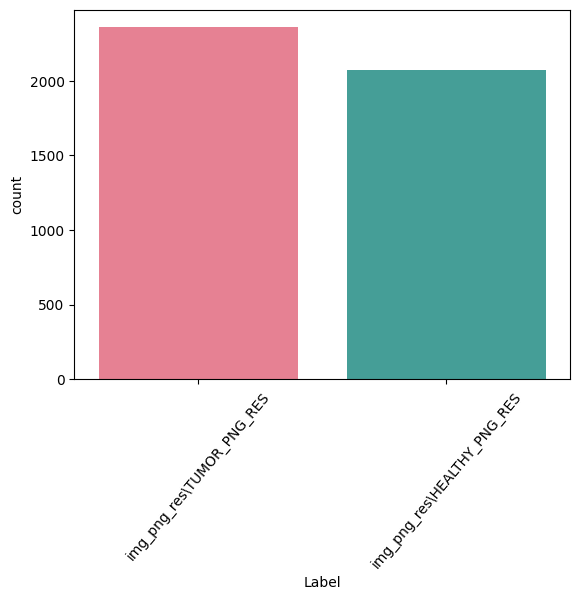

In [86]:
# Define una paleta de colores
palette = sns.color_palette("husl", len(dataframe["Label"].unique()))

# Crea el gráfico de barras con la paleta de colores
sns.countplot(x=dataframe["Label"], palette=palette)

# Rota las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=50)

# Muestra el gráfico
plt.show()

In [90]:
# Estadísticas descriptivas
dataframe.describe()

,Image,Label
count,4432,4432
unique,4432,2
top,C:/Users/HP/Desktop/PFG/CODIGO/img_png_res\TUM...,img_png_res\TUMOR_PNG_RES
freq,1,2358


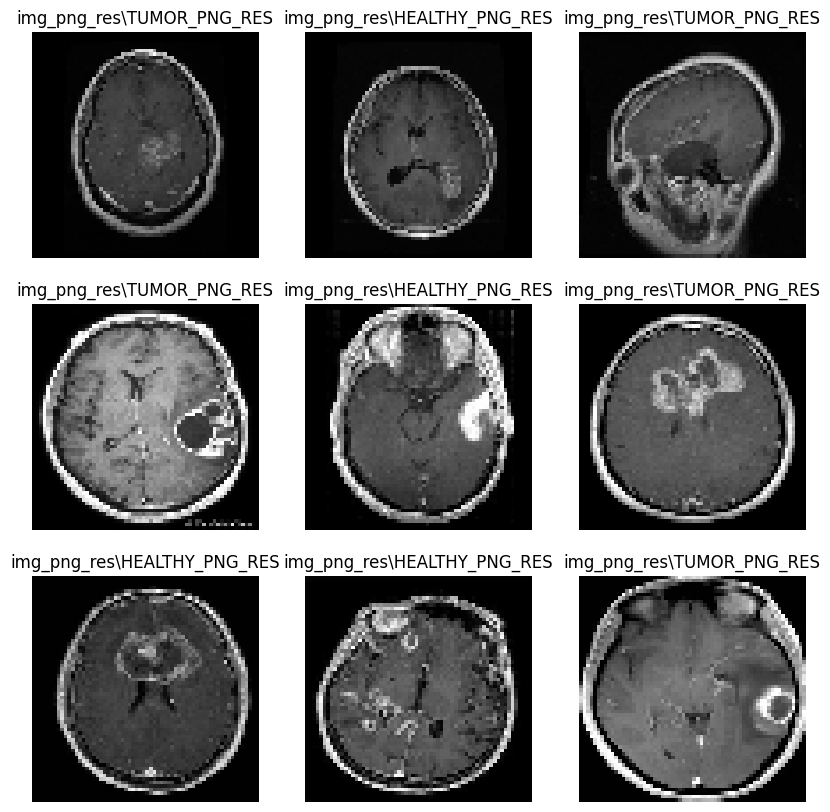

In [91]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(labels[i])
    plt.axis('off')
plt.show()


In [44]:
# Load images
tumor_images, tumor_labels = load_images_from_folder(tumor_path, 1)
non_tumor_images, non_tumor_labels = load_images_from_folder(non_tumor_path, 0)


In [92]:
print("Estadísticas de las Imágenes Sanas:")
print("Valor medio del píxel:", np.mean(non_tumor_images))
print("Mediana del valor del píxel:", np.median(non_tumor_images))
print("Desviación estándar de los valores de los píxeles:", np.std(non_tumor_images))

print("\nEstadísticas de las Imágenes con Tumor:")
print("Valor medio del píxel:", np.mean(tumor_images))
print("Mediana del valor del píxel:", np.median(tumor_images))
print("Desviación estándar de los valores de los píxeles:", np.std(tumor_images))

Estadísticas de las Imágenes Sanas:
Valor medio del píxel: 59.8359211376341
Mediana del valor del píxel: 36.0
Desviación estándar de los valores de los píxeles: 65.00861067832923

Estadísticas de las Imágenes con Tumor:
Valor medio del píxel: 63.80431952893077
Mediana del valor del píxel: 50.0
Desviación estándar de los valores de los píxeles: 67.73322137280545


In [45]:
# Combine datasets
images = np.array(tumor_images + non_tumor_images)
labels = np.array(tumor_labels + non_tumor_labels)

# Normalize pixel values
images = images / 255.0


In [46]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [47]:
# Reshape for CNN input
X_train = X_train.reshape(-1, 64, 64, 1)
X_test = X_test.reshape(-1, 64, 64, 1)

## MODELO 1

In [48]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [49]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 29s 176ms/step - accuracy: 0.6717 - loss: 0.5984 - val_accuracy: 0.8038 - val_loss: 0.4045
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 18s 163ms/step - accuracy: 0.8411 - loss: 0.3739 - val_accuracy: 0.8816 - val_loss: 0.3157
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 24s 191ms/step - accuracy: 0.9028 - loss: 0.2672 - val_accuracy: 0.9076 - val_loss: 0.2278
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 41s 185ms/step - accuracy: 0.9262 - loss: 0.1966 - val_accuracy: 0.9211 - val_loss: 0.2215
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 22s 195ms/step - accuracy: 0.9498 - loss: 0.1465 - val_accuracy: 0.9369 - val_loss: 0.1508
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 40s 184ms/step - accuracy: 0.9701 - loss: 0.1019 - val_accuracy: 0.9560 - val_loss: 0.1260
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 20s 175ms/step - accuracy: 0.9778 - loss: 0.0739 - val_accuracy: 0.9673 - val_loss: 0.1043
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 21s 175ms/step - accuracy: 0.9819 - loss: 0

In [50]:
import pandas as pd
hist_=pd.DataFrame(history.history)
hist_

,accuracy,loss,val_accuracy,val_loss
0,0.740480,0.528703,0.803833,0.404490
1,0.846544,0.357775,0.881623,0.315712
2,0.900423,0.257094,0.907554,0.227828
3,0.929760,0.191037,0.921082,0.221536
4,0.952327,0.132888,0.936866,0.150812
5,0.970945,0.095967,0.956032,0.125969
6,0.978561,0.067625,0.967306,0.104323
7,0.983357,0.052322,0.954904,0.114800
8,0.986742,0.041892,0.971815,0.086428
9,0.993794,0.028377,0.977452,0.083857


In [51]:
# Evaluar el modelo en los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss en los datos de prueba:", loss)
print("Precisión en los datos de prueba:", accuracy)


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.9814 - loss: 0.0675
Loss en los datos de prueba: 0.08385700732469559
Precisión en los datos de prueba: 0.9774520993232727


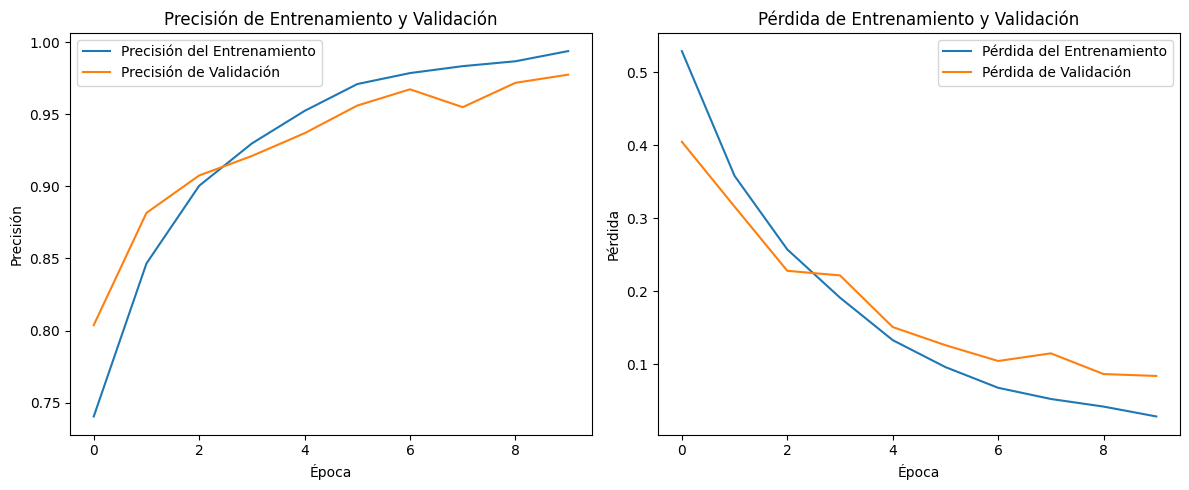

In [52]:
# Gráfico de precisión y pérdida durante el entrenamiento y la validación
plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión del Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión de Entrenamiento y Validación')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida del Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida de Entrenamiento y Validación')
plt.legend()

plt.tight_layout()
plt.show()

In [53]:
print("Forma de X_test:", X_test.shape)
print("Tipo de datos de X_test:", X_test.dtype)


Forma de X_test: (887, 64, 64, 1)
Tipo de datos de X_test: float64


In [54]:
y_pred_prob = model.predict(X_test, verbose=1)

28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step


In [55]:
# Make predictions with verbose output
y_pred_prob = model.predict(X_test, verbose=1)

# Convert probabilities to binary labels based on a threshold of 0.5
y_pred = (y_pred_prob > 0.5).astype(int)

# Create a DataFrame to display actual and predicted labels
results = pd.DataFrame({
    'Etiqueta Actual': y_test.flatten(),  # Adjust according to the shape of your actual labels
    'Etiqueta Predicha': y_pred.flatten()
})

# Display the DataFrame
results


28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step


,Etiqueta Actual,Etiqueta Predicha
0,0,0
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
882,0,1
883,0,0
884,1,1
885,1,1


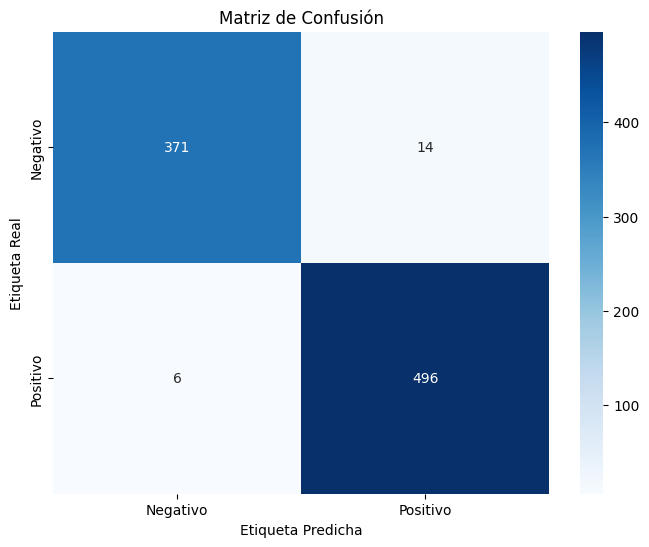

In [56]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()

In [57]:
# Define the CNN model
# Define the CNN architecture
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Using sigmoid for binary classification
])

model2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [58]:
history2 = model2.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 50s 291ms/step - accuracy: 0.6071 - loss: 0.6512 - val_accuracy: 0.7576 - val_loss: 0.4880
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 38s 262ms/step - accuracy: 0.8062 - loss: 0.4390 - val_accuracy: 0.8331 - val_loss: 0.3809
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 31s 273ms/step - accuracy: 0.8570 - loss: 0.3443 - val_accuracy: 0.8918 - val_loss: 0.2689
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 36s 218ms/step - accuracy: 0.9192 - loss: 0.2252 - val_accuracy: 0.9278 - val_loss: 0.2067
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 42s 220ms/step - accuracy: 0.9446 - loss: 0.1509 - val_accuracy: 0.9369 - val_loss: 0.1729
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 25s 220ms/step - accuracy: 0.9716 - loss: 0.0897 - val_accuracy: 0.9369 - val_loss: 0.1652
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 42s 226ms/step - accuracy: 0.9850 - loss: 0.0583 - val_accuracy: 0.9594 - val_loss: 0.1834
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 26s 229ms/step - accuracy: 0.9860 - loss: 0

In [59]:
import pandas as pd
hist_=pd.DataFrame(history2.history)
hist_

,accuracy,loss,val_accuracy,val_loss
0,0.654725,0.608436,0.757610,0.487995
1,0.821721,0.406983,0.833145,0.380851
2,0.879831,0.303674,0.891770,0.268931
3,0.924401,0.212586,0.927847,0.206749
4,0.953738,0.136662,0.936866,0.172855
5,0.966996,0.097219,0.936866,0.165236
6,0.985614,0.053669,0.959414,0.183430
7,0.987024,0.040685,0.948140,0.172831
8,0.990127,0.031419,0.966178,0.132371
9,0.989563,0.026638,0.956032,0.155920


In [60]:
# Evaluar el modelo en los datos de prueba
loss, accuracy = model2.evaluate(X_test, y_test)
print("Loss en los datos de prueba:", loss)
print("Precisión en los datos de prueba:", accuracy)


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9657 - loss: 0.1106
Loss en los datos de prueba: 0.15591956675052643
Precisión en los datos de prueba: 0.9560315608978271


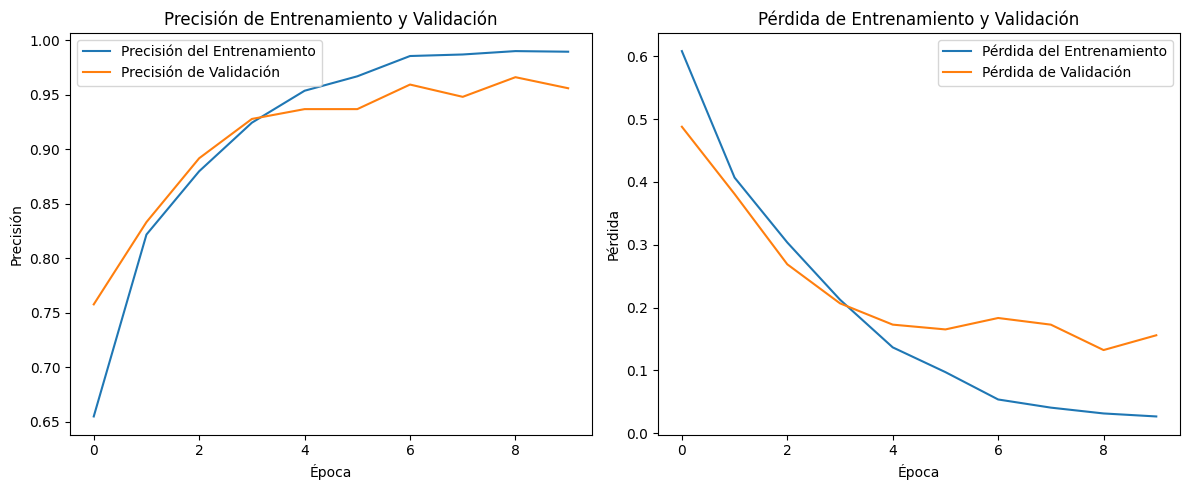

In [61]:
# Gráfico de precisión y pérdida durante el entrenamiento y la validación
plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Precisión del Entrenamiento')
plt.plot(history2.history['val_accuracy'], label='Precisión de Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión de Entrenamiento y Validación')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Pérdida del Entrenamiento')
plt.plot(history2.history['val_loss'], label='Pérdida de Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida de Entrenamiento y Validación')
plt.legend()

plt.tight_layout()
plt.show()

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step


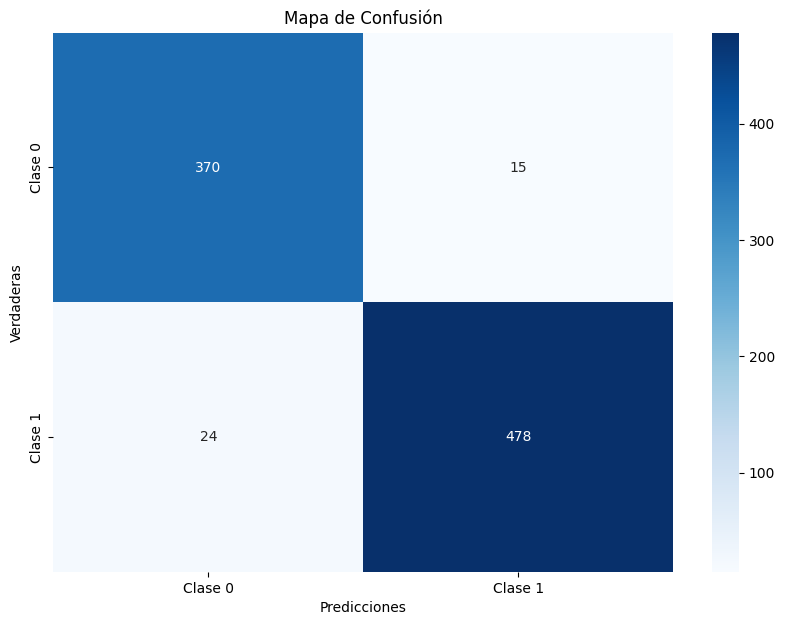

In [62]:
# Predecir las etiquetas para el conjunto de datos de prueba
y_pred = model2.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convierte probabilidades a etiquetas binarias

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión usando seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicciones')
plt.ylabel('Verdaderas')
plt.title('Mapa de Confusión')
plt.show()


In [63]:
# Create a DataFrame to display actual and predicted labels
results = pd.DataFrame({
    'Etiqueta Actual': y_test.flatten(),  # Adjust according to the shape of your actual labels
    'Etiqueta Predicha': y_pred.flatten()
})

# Display the DataFrame
results

,Etiqueta Actual,Etiqueta Predicha
0,0,0
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
882,0,1
883,0,0
884,1,1
885,1,1


In [64]:
def compare_models(history, history2, model, model2, X_test, y_test):
    # Comparar precisión
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Modelo 1 - Precisión en Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Modelo 1 - Precisión en Validación')
    plt.plot(history2.history['accuracy'], label='Modelo 2 - Precisión en Entrenamiento')
    plt.plot(history2.history['val_accuracy'], label='Modelo 2 - Precisión en Validación')
    plt.title('Comparación de la Precisión de los Modelos')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()

    # Comparar pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Modelo 1 - Pérdida en Entrenamiento')
    plt.plot(history.history['val_loss'], label='Modelo 1 - Pérdida en Validación')
    plt.plot(history2.history['loss'], label='Modelo 2 - Pérdida en Entrenamiento')
    plt.plot(history2.history['val_loss'], label='Modelo 2 - Pérdida en Validación')
    plt.title('Comparación de la Pérdida de los Modelos')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Evaluación en el conjunto de prueba
    score1 = model.evaluate(X_test, y_test, verbose=0)
    score2 = model2.evaluate(X_test, y_test, verbose=0)
    print(f"Modelo 1 - Pérdida: {score1[0]}, Precisión: {score1[1]}")
    print(f"Modelo 2 - Pérdida: {score2[0]}, Precisión: {score2[1]}")


In [65]:
def compare_models(history, history2, model, model2, X_test, y_test):
    # Comparar precisión
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Modelo 1 - Precisión en Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Modelo 1 - Precisión en Validación')
    plt.plot(history2.history['accuracy'], label='Modelo 2 - Precisión en Entrenamiento')
    plt.plot(history2.history['val_accuracy'], label='Modelo 2 - Precisión en Validación')
    plt.title('Comparación de la Precisión de los Modelos')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()

    # Comparar pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Modelo 1 - Pérdida en Entrenamiento')
    plt.plot(history.history['val_loss'], label='Modelo 1 - Pérdida en Validación')
    plt.plot(history2.history['loss'], label='Modelo 2 - Pérdida en Entrenamiento')
    plt.plot(history2.history['val_loss'], label='Modelo 2 - Pérdida en Validación')
    plt.title('Comparación de la Pérdida de los Modelos')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Evaluación en el conjunto de prueba
    score1 = model.evaluate(X_test, y_test, verbose=0)
    score2 = model2.evaluate(X_test, y_test, verbose=0)
    print(f"Modelo 1 - Pérdida: {score1[0]}, Precisión: {score1[1]}")
    print(f"Modelo 2 - Pérdida: {score2[0]}, Precisión: {score2[1]}")


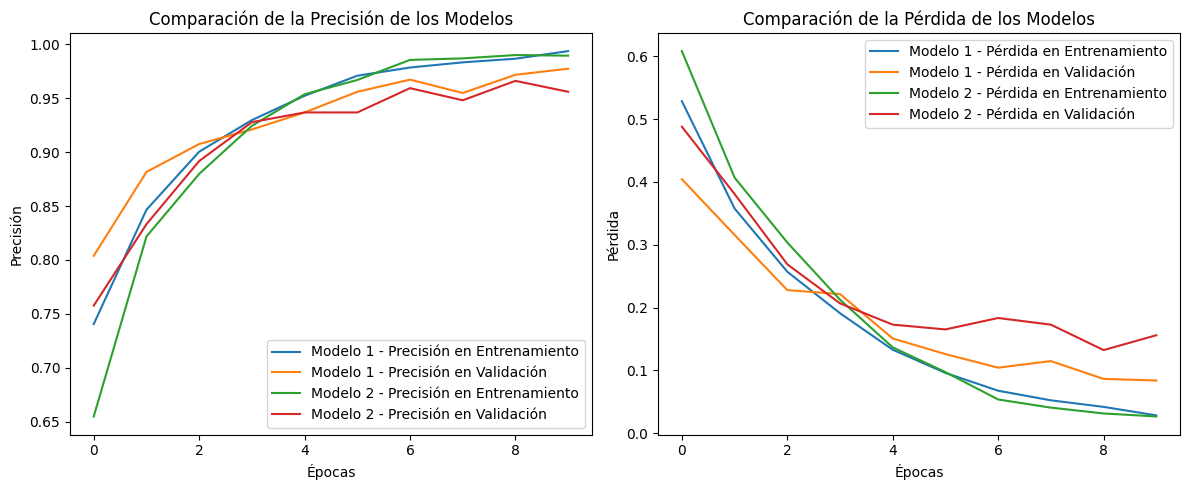

Modelo 1 - Pérdida: 0.08385700732469559, Precisión: 0.9774520993232727
Modelo 2 - Pérdida: 0.15591956675052643, Precisión: 0.9560315608978271


In [66]:
compare_models(history, history2, model, model2, X_test, y_test)

In [67]:
def prepare_image(image_path):
    """Prepara una imagen para ser evaluada por el modelo CNN."""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img = cv2.resize(img, (64, 64))  # Redimensiona la imagen a 64x64
        img = img / 255.0  # Normaliza los valores de los píxeles
        img = np.expand_dims(img, axis=-1)  # Añade una dimensión de canal
        img = np.expand_dims(img, axis=0)  # Añade una dimensión de lote
        return img
    else:
        return None


In [68]:
def predict_tumor_model1(image_path, model):
    """Determina si la imagen contiene un tumor utilizando el modelo CNN."""
    img = prepare_image(image_path)
    if img is not None:
        prediction = model.predict(img)
        return "Tumor" if prediction[0][0] > 0.5 else "No Tumor"
    else:
        return "La imagen no se encontró o no pudo leerse"


In [69]:
# Cargar el modelo entrenado (asegúrate de que el modelo está correctamente cargado)
# model = cargar_tu_modelo()  # Asume que tienes una función para cargar el modelo

# Ruta de la imagen a evaluar
image_path = 'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA NO CANCER.png'

# Hacer la predicción
result = predict_tumor_model1(image_path, model)
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
No Tumor


In [70]:
# Ruta de la imagen a evaluar
image_path = 'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA CANCER O NO.png'

# Hacer la predicción
result = predict_tumor_model1(image_path, model)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Tumor


In [71]:
# Ruta de la imagen a evaluar
image_path = 'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA CANCER O NO 1.png'

# Hacer la predicción
result = predict_tumor_model1(image_path, model)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step
Tumor


In [72]:
def predict_tumor_with_prob_model1(image_path, model):
    """Determina si la imagen contiene un tumor y devuelve la probabilidad de la predicción."""
    img = prepare_image(image_path)
    if img is not None:
        prediction = model.predict(img)
        probability = prediction[0][0]
        return ("Tumor", probability) if probability > 0.5 else ("No Tumor", 1 - probability)
    else:
        return ("La imagen no se encontró o no pudo leerse", None)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


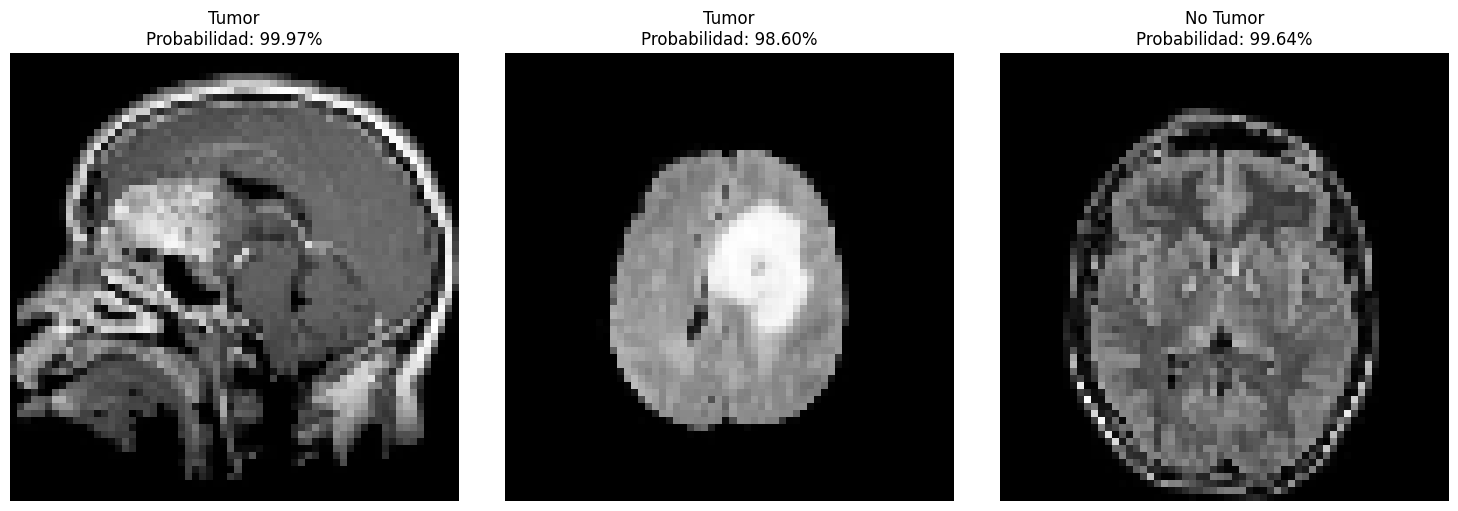

In [73]:
import matplotlib.pyplot as plt

# Rutas de las imágenes
image_paths = [
    'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA CANCER O NO 1.png',
    'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA CANCER O NO.png',
    'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA NO CANCER.png'
]

# Cargar modelo
# model = cargar_tu_modelo()  # Asume que tienes una función para cargar el modelo

# Crear subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Procesar cada imagen y mostrar
for ax, image_path in zip(axes, image_paths):
    label, prob = predict_tumor_with_prob_model1(image_path, model)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (64, 64))  # Asegura que todas las imágenes se muestren al mismo tamaño
    
    ax.imshow(img, cmap='gray')
    ax.title.set_text(f'{label}\nProbabilidad: {prob:.2%}')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [74]:
def predict_tumor_model2(image_path, model2):
    """Determina si la imagen contiene un tumor utilizando el modelo CNN."""
    img = prepare_image(image_path)
    if img is not None:
        prediction = model2.predict(img)
        return "Tumor" if prediction[0][0] > 0.5 else "No Tumor"
    else:
        return "La imagen no se encontró o no pudo leerse"

In [75]:
# Ruta de la imagen a evaluar
image_path = 'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA NO CANCER.png'

# Hacer la predicción
result = predict_tumor_model2(image_path, model2)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
No Tumor


In [76]:
# Ruta de la imagen a evaluar
image_path = 'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA CANCER O NO.png'

# Hacer la predicción
result = predict_tumor_model2(image_path, model2)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
Tumor


In [77]:
# Ruta de la imagen a evaluar
image_path = 'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA CANCER O NO 1.png'

# Hacer la predicción
result = predict_tumor_model2(image_path, model2)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Tumor


In [78]:
def predict_tumor_with_prob_model2(image_path, model2):
    """Determina si la imagen contiene un tumor y devuelve la probabilidad de la predicción."""
    img = prepare_image(image_path)
    if img is not None:
        prediction = model2.predict(img)
        probability = prediction[0][0]
        return ("Tumor", probability) if probability > 0.5 else ("No Tumor", 1 - probability)
    else:
        return ("La imagen no se encontró o no pudo leerse", None)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


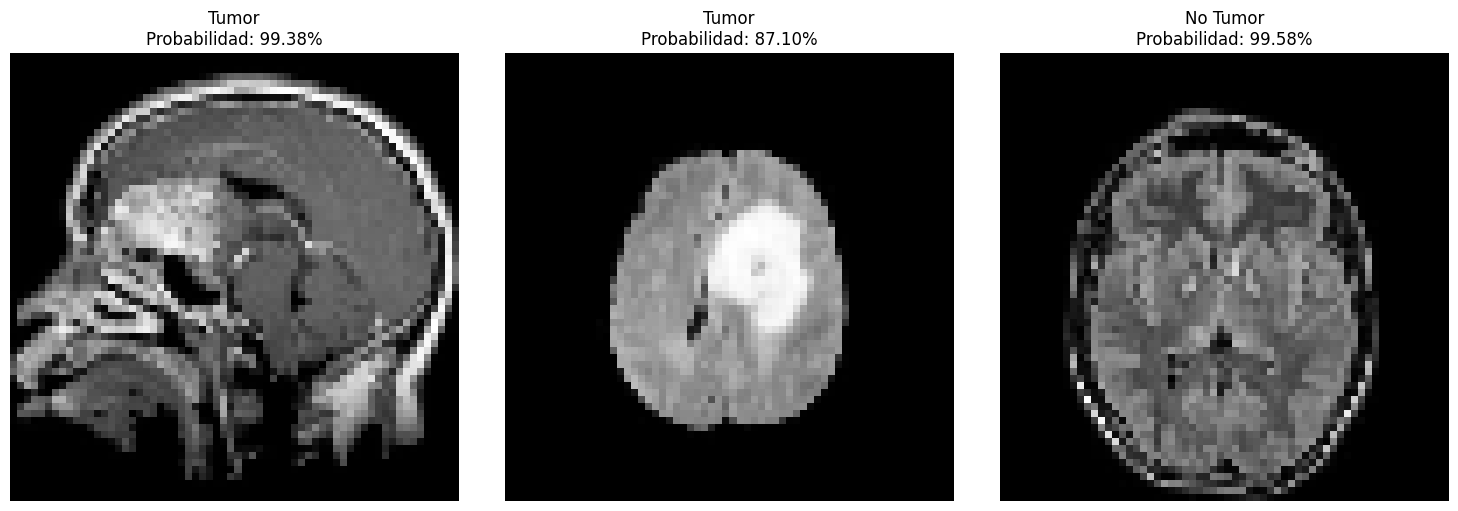

In [80]:
# Rutas de las imágenes
image_paths = [
    'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA CANCER O NO 1.png',
    'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA CANCER O NO.png',
    'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA NO CANCER.png'
]

# Cargar modelo
# model = cargar_tu_modelo()  # Asume que tienes una función para cargar el modelo

# Crear subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Procesar cada imagen y mostrar
for ax, image_path in zip(axes, image_paths):
    label, prob = predict_tumor_with_prob_model1(image_path, model2)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (64, 64))  # Asegura que todas las imágenes se muestren al mismo tamaño
    
    ax.imshow(img, cmap='gray')
    ax.title.set_text(f'{label}\nProbabilidad: {prob:.2%}')
    ax.axis('off')

plt.tight_layout()
plt.show()